# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

### 1) Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. Há linhas duplicadas?

In [173]:
import pandas as pd
import requests

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

### 2) Conte o número de valores missing por variável.


In [174]:
print(sinasc.isna().sum())

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64


In [175]:
#Podemos tentar melhorar essa visualzação pegando um Dict
test = sinasc.isna().sum().to_dict()
for key, value in test.items():
    print(f"\033[91m{key}\033[0m tem \033[91m{value}\033[0m dados missing")

ORIGEM tem 0 dados missing
CODESTAB tem 115 dados missing
CODMUNNASC tem 0 dados missing
LOCNASC tem 0 dados missing
IDADEMAE tem 0 dados missing
ESTCIVMAE tem 317 dados missing
ESCMAE tem 312 dados missing
CODOCUPMAE tem 2907 dados missing
QTDFILVIVO tem 1573 dados missing
QTDFILMORT tem 2098 dados missing
CODMUNRES tem 0 dados missing
GESTACAO tem 1232 dados missing
GRAVIDEZ tem 79 dados missing
PARTO tem 49 dados missing
CONSULTAS tem 0 dados missing
DTNASC tem 0 dados missing
HORANASC tem 21 dados missing
SEXO tem 4 dados missing
APGAR1 tem 96 dados missing
APGAR5 tem 103 dados missing
RACACOR tem 647 dados missing
PESO tem 0 dados missing
IDANOMAL tem 591 dados missing
DTCADASTRO tem 0 dados missing
CODANOMAL tem 26814 dados missing
NUMEROLOTE tem 0 dados missing
VERSAOSIST tem 0 dados missing
DTRECEBIM tem 0 dados missing
DIFDATA tem 0 dados missing
DTRECORIGA tem 27028 dados missing
NATURALMAE tem 298 dados missing
CODMUNNATU tem 298 dados missing
CODUFNATU tem 298 dados missing

In [176]:
#Poderiamos usar sinasc.info() para observar um pouco da proporção de dados missing

### 3)Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas: ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] Refaça a contagem de valores missings.

In [177]:
reduced = sinasc.loc[:,['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]
reduced.isna().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

### 4) Apgar é uma nota que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de missings


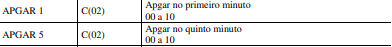

In [178]:
reduced.dropna(subset=['APGAR5'],inplace=True)

In [179]:
print(f"{reduced.shape[0]} linhas")

26925 linhas


In [180]:
reduced.isna().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      315
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

### 5) observe que as variáveis ['ESTCIVMAE', 'CONSULTAS'] possuem o código 9, que significa ignorado. Vamos assumir que o não preenchido é o mesmo que o código 9.


In [181]:
import numpy as np

reduced.loc[reduced['ESTCIVMAE'].isna(), ['ESTCIVMAE']] = 9
reduced.loc[reduced['CONSULTAS'].isna(), ['CONSULTAS']] = 9
reduced.isna().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE        0
ESCMAE         310
QTDFILVIVO    1566
GESTACAO      1216
GRAVIDEZ        76
CONSULTAS        0
APGAR5           0
dtype: int64

### 6) Substitua os valores faltantes da quantitativa (QTDFILVIVO) por zero.


In [182]:
reduced.loc[reduced['QTDFILVIVO'].isna(),['QTDFILVIVO']] = 0

In [183]:
reduced.loc[reduced['QTDFILVIVO']==0].head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
7,1,27,2.0,12 anos ou mais,0.0,37 a 41 semanas,Única,4,10.0
8,1,20,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,3,9.0
12,1,21,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,9.0


### 7) Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.


In [184]:
a = reduced['GRAVIDEZ'].value_counts().tolist()
print(f"A proporção de gravidez única antes da alteração é de: {round((a[0]/reduced.shape[0])*100,2)}%")

A proporção de gravidez única antes da alteração é de: 97.89%


In [185]:
reduced.loc[reduced['GRAVIDEZ'].isna(),'GRAVIDEZ'] = 'Única'

In [186]:
a = reduced['GRAVIDEZ'].value_counts().tolist()
print(f"A proporção de gravidez única depois da alteração é de: {round((a[0]/reduced.shape[0])*100,2)}%")

A proporção de gravidez única depois da alteração é de: 98.17%


In [187]:
print(f"Teve uma variação de {round(98.17 - 97.89,3)}%\n\nOu seja, não vai fazer diferença na nossa base caso precisamos fazer alguma análise.\nO que fiz foi pegar os dados vazios e transformar para gravidez única, já que a variação é bem pouca. ")

Teve uma variação de 0.28%

Ou seja, não vai fazer diferença na nossa base caso precisamos fazer alguma análise.
O que fiz foi pegar os dados vazios e transformar para gravidez única, já que a variação é bem pouca. 


### 8)O Apgar possui uma classificação indicando se o bebê passou por asfixia:

* Entre 8 e 10 está em uma faixa 'normal'.
* Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
* Entre 4 e 5 significa 'asfixia moderada'.
* Entre 0 e 3 significa 'asfixia severa'


Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.

In [188]:
# 8) seu código aqui
reduced.loc[reduced['APGAR5'] <= 3, 'Asfixia apgar5'] = 'SEVERA'
reduced.loc[(reduced['APGAR5']>3) & (reduced['APGAR5']<=5),'Asfixia apgar5'] = 'MODERADA'
reduced.loc[(reduced['APGAR5']>=6) & (reduced['APGAR5']<8),'Asfixia apgar5'] = 'LEVE'
reduced.loc[(reduced['APGAR5']>=8),'Asfixia apgar5'] = 'NORMAL'
reduced.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5,Asfixia apgar5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,NORMAL
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,NORMAL
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,NORMAL
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,NORMAL
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,NORMAL


In [189]:
reduced['Asfixia apgar5'].value_counts()

NORMAL      26463
LEVE          320
SEVERA         74
MODERADA       68
Name: Asfixia apgar5, dtype: int64

In [190]:
#pd.get_dummies(reduced['APGAR5'])

### 9) Renomeie as variáveis para que fiquem no snake case, ou seja, em letras minúsculas, com um underscore entre as palávras. Dica: repare que se você não quiser criar um dataframe novo, você vai precisar usar a opção inplace = True.

In [191]:
# 9) seu código aqui
reduced.columns

Index(['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO',
       'GRAVIDEZ', 'CONSULTAS', 'APGAR5', 'Asfixia apgar5'],
      dtype='object')

**Primeira maneira que eu pensei**

In [192]:
new_columns = [x.lower() if not ' ' in x else x.replace(' ','_').lower() for x in reduced.columns.tolist()]
reduced.columns = new_columns

In [193]:
reduced.head()

,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,asfixia_apgar5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,NORMAL
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,NORMAL
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,NORMAL
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,NORMAL
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,NORMAL


***Depois de procurar, vi que consigo adicionar uma função no 'columns', o que fica bem mais legível pra quem não entende o List Comprehensions e sabe de funções. Ficaria assim: ***
***
```df.rename(columns=lambda x: x.lower().replace(" ","_"),inplace=True)```
***